## Plot the diagram

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
all_data=[np.random.normal(0,std,100) for std in range(1,4)]

In [11]:
def countFamilyMemberNumber(path):
    
    standAloneModels = []
    familyCount = 0
    familyMemberCount = 0
    
    for tasktype in os.listdir(path):
        taskTypeFolder = os.path.join(path, tasktype)
        for family in os.listdir(taskTypeFolder):
            familyFolder = os.path.join(taskTypeFolder, family)
            ### those files are not in any families.
            if not os.path.isdir(familyFolder):
                if ".md" in familyFolder:
                    standAloneModels.append(familyFolder)
                continue 
            ### "NNLM" family is special. 
            if family == "NNLM" or family == "CompareGAN":
                for language in os.listdir(familyFolder):
                    familySubFolder = os.path.join(familyFolder, language)
                    members = []
                    for md in os.listdir(familySubFolder):
                        if ".md" in md:
                            members.append(md)
                    familyMemberCount += len(members)
                    print(tasktype, "{}-{}".format(family, language), len(members))
                    familyCount += 1
            ### other families are counted like this. 
            else:
                members = []
                for md in os.listdir(familyFolder):
                    if ".md" in md:
                        members.append(md)
                familyMemberCount += len(members)
                print(tasktype, family, len(members))
                familyCount += 1
    ## verify the total amount of models. 
    print(len(standAloneModels) + familyMemberCount)
    print("There are {} families in total. There are {} family members.".format(familyCount, familyMemberCount))
    return 

countFamilyMemberNumber(r"J:\EMSE2020_MLPackage\RQ2-Data_Extraction\family_grouping-final")

audio-embedding nonsemantic-speech-benchmark-trill 2
image-classification EfficientNet 13
image-classification Inception V3 2
image-classification MobileNet V1 32
image-classification MobileNet V2 23
image-classification NasNet 2
image-classification ResNet V1 4
image-classification ResNet V2 3
image-feature-vector EfficientNet 13
image-feature-vector examplar 2
image-feature-vector Inception V3 2
image-feature-vector MobileNet V1 32
image-feature-vector MobileNet V2 23
image-feature-vector NasNet 2
image-feature-vector remote_sensing-eurosat-resnet50 2
image-feature-vector remote_sensing-so2sat-resnet50 2
image-feature-vector ResNet V1 4
image-feature-vector ResNet V2 3
image-feature-vector rotation 2
image-feature-vector wae 2
image-generator BigBiGAN 2
image-generator BigGAN 6
image-generator CompareGAN-celebahq128 5
image-generator CompareGAN-cifar 5
image-generator CompareGAN-lsun 5
image-generator CompareGAN-S3GAN 5
image-rnn-agent SPIRAL 10
image-segmentation UNet 10
text-embedd

### Manually generate 2 files: `TFHub.csv`, `PTHub.csv` from the family grouping result. 

In [12]:
aihub = pd.read_csv("TFHub.csv")
# aihub

In [13]:
aihub[aihub["Task Type"] == "IC"]["Num"]

1    13
2     2
3    32
4    23
5     2
6     4
7     3
Name: Num, dtype: int64

In [14]:
pthub = pd.read_csv("PTHub.csv")
# pthub

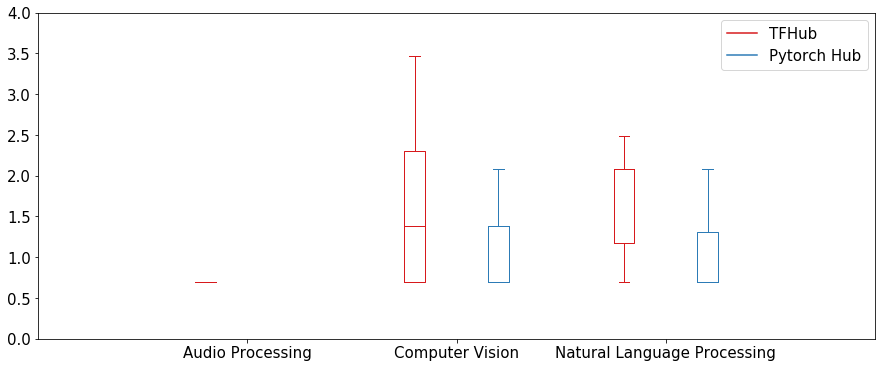

In [15]:
## https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
import matplotlib.pyplot as plt
import numpy as np

# data_aihub = (
#     np.log(aihub[aihub["Task Type"] == "IC"]["Num"]),
#     np.log(aihub[aihub["Task Type"] == "IV"]["Num"]),
#     np.log(aihub[aihub["Task Type"] == "IG"]["Num"]), 
#     np.log(aihub[aihub["Task Type"] == "TE"]["Num"]), 
#     np.log(aihub[aihub["Task Type"] == "VU"]["Num"]),
#     np.log(aihub[aihub["Task Type"] == "OD"]["Num"]), 
# )

# data_pthub = (
#     np.log(pthub[pthub["Task Type"] == "IC"]["Num"]),
#     np.log(pthub[pthub["Task Type"] == "IV"]["Num"]),
#     np.log(pthub[pthub["Task Type"] == "IG"]["Num"]),
#     np.log(pthub[pthub["Task Type"] == "TE"]["Num"]),
#     np.log(pthub[pthub["Task Type"] == "VU"]["Num"]),
#     np.log(pthub[pthub["Task Type"] == "OD"]["Num"]),
# )

# ticks = ['Image Classification', 'Image Feature Vector', 'Image Generation', 'Text Embedding', 'Video Understanding', 'Object Detection']

data_aihub = (
    np.log(aihub[(aihub["Task Type"] == "AE")]["Num"]), 
    
    np.log(aihub[(aihub["Task Type"] == "IC") | 
                 (aihub["Task Type"] == "IV") | 
                 (aihub["Task Type"] == "IG") | 
                 (aihub["Task Type"] == "IS") |
                 (aihub["Task Type"] == "VU") | 
                 (aihub["Task Type"] == "OD")]["Num"]),
    
    np.log(aihub[(aihub["Task Type"] == "TE") |
                 (aihub["Task Type"] == "TQA")]["Num"]), 
)

data_pthub = ( 
    np.log(pthub[(pthub["Task Type"] == "AE")]["Num"]), 
    
    np.log(pthub[(pthub["Task Type"] == "IC") | 
                 (pthub["Task Type"] == "IV") |
                 (pthub["Task Type"] == "IG") | 
                 (pthub["Task Type"] == "IS") |
                 (pthub["Task Type"] == "VU") | 
                 (pthub["Task Type"] == "OD")]["Num"]),
    
    np.log(pthub[(pthub["Task Type"] == "TE") |
                 (pthub["Task Type"] == "TQA")]["Num"]), 
)

ticks = ["Audio Processing", "Computer Vision", "Natural Language Processing"]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(15, 6))

bp1 = plt.boxplot(data_aihub, positions=np.array(range(len(data_aihub)))*2.0-0.4, sym='', widths=0.2)
bp2 = plt.boxplot(data_pthub, positions=np.array(range(len(data_pthub)))*2.0+0.4, sym='', widths=0.2)

set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='TFHub')
plt.plot([], c='#2C7BB6', label='Pytorch Hub')
plt.legend(fontsize = 15)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xticks(fontsize=15)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 4)
plt.yticks(fontsize=15)
# plt.tight_layout()
# plt.show()
plt.savefig("familyNumDistribution_appDomain.pdf")